In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
RESULT_PATH = "../result/result.csv"

df_result = pd.read_csv(
    filepath_or_buffer=RESULT_PATH
)

print(df_result.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   round       1000 non-null   int64  
 1   strategy    1000 non-null   object 
 2   c_loss      901 non-null    float64
 3   c_accuracy  1000 non-null   float64
 4   d_accuracy  1000 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 39.2+ KB
None


In [31]:
print(df_result['strategy'].unique())

['FedAvg' 'FedAvgM' 'QFedAvg' 'FaultTolerantFedAvg' 'FedOpt' 'FedProx'
 'FedAdagrad' 'FedAdam' 'FedYogi' 'Central']


In [32]:
df = df_result[df_result['strategy'] == 'FedAvgM'].sort_values(by=['round'])
print(df.head())
print(df['c_loss'].values)

     round strategy    c_loss  c_accuracy  d_accuracy
100      1  FedAvgM  2.296735      0.1401      0.1401
101      2  FedAvgM  2.256090      0.1702      0.1702
102      3  FedAvgM  2.095903      0.2426      0.2426
103      4  FedAvgM  1.998464      0.2772      0.2772
104      5  FedAvgM  1.921773      0.3118      0.3118
[2.2967349  2.25608952 2.09590296 1.99846443 1.92177266 1.8585049
 1.77807389 1.7206277  1.68126949 1.67053798 1.62548788 1.60369433
 1.58651368 1.5707613  1.56237259 1.53427461 1.52326182 1.49381418
 1.47771457 1.46686896 1.44746556 1.43566389 1.43630297 1.42337714
 1.411866   1.39706781 1.37298163 1.39775778 1.36034174 1.35369277
 1.34788671 1.33005666 1.32300256 1.31662528 1.32364577 1.30187061
 1.28696815 1.27742059 1.28190132 1.26654041 1.26250519 1.25447547
 1.25047047 1.25214307 1.2406895  1.23105385 1.23716082 1.22522386
 1.2140037  1.22196    1.21376    1.22734222 1.19187591 1.19917907
 1.19655206 1.18686036 1.18651913 1.18872822 1.1767999  1.18114899
 1.1791

In [33]:
print(sorted(df_result['round'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [34]:
df_loss = pd.DataFrame(index=sorted(df_result['round'].unique()))
df_accuracy = pd.DataFrame(index=sorted(df_result['round'].unique()))


for strategy in df_result['strategy'].unique():
    df = df_result[df_result['strategy'] == strategy].sort_values(by=['round'])
    df_loss[strategy] = df['c_loss'].values
    df_accuracy[strategy] = df['c_accuracy'].values


#print(df_loss.isna().any())
#print(df_accuracy.isna().any())

df_loss = df_loss.drop(['FedAdagrad', 'FedAdam'], axis=1)
df_accuracy = df_accuracy.drop(['FedAdagrad', 'FedAdam'], axis=1)

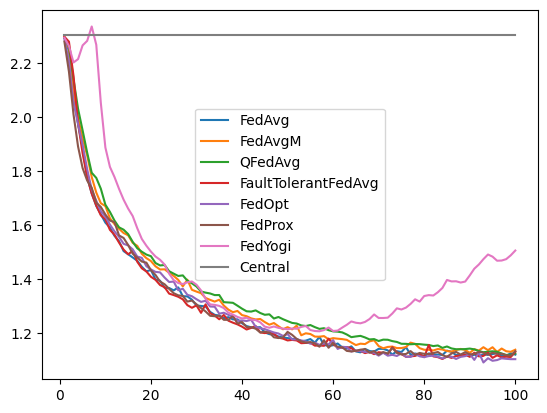

In [35]:
line_loss = df_loss.plot.line()

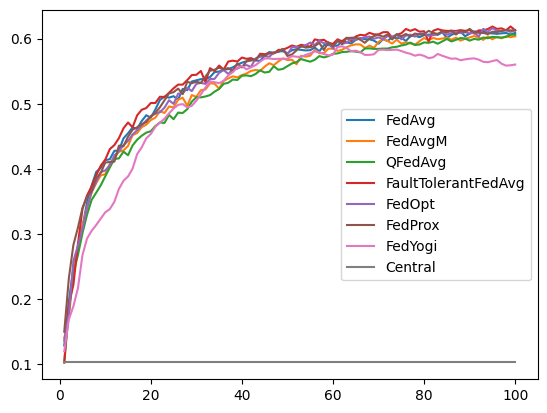

In [36]:
line_accuracy = df_accuracy.plot.line()